## Descripción del proyecto

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde **abrir 200 pozos nuevos de petróleo**.



## Descripción de datos

- *id* — identificador único de pozo de petróleo
- *f0, f1, f2* — tres características de los puntos (su significado específico no es
importante, pero las características en sí son significativas)
- *product* — volumen de reservas en el pozo de petróleo (miles de barriles).



## Indice del proyecto
1. [Descarga y preparacion de los datos](#Descarga-y-preparacion-de-los-datos)
2. [Entrenamiento y prueba del modelo por region](#Entrenamiento-y-prueba-del-modelo-por-region)
3. [Calculo de ganancias](#calculo-de-ganancias)
4. [Calculando ganancias en regiones petroleras](#calculando-ganancias-en-regiones-petroleras)
5. [Calculando riesgos y ganancias](#calculando-riesgos-y-gananacias)
6. [Conclusiones generales](#conclusiones-generales)

### Descarga y preparacion de los datos

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:

geo_data1= pd.read_csv('/datasets/geo_data_0.csv')
geo_data2 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data3 = pd.read_csv('/datasets/geo_data_2.csv')

#geo_data1= pd.read_csv('geo_data_0.csv')
#geo_data2 = pd.read_csv('geo_data_1.csv')
#geo_data3 = pd.read_csv('geo_data_2.csv')

se preparan los datos

In [3]:


def data_information(data):
    information = data.info()
    describe = data.describe()
    duplicates = data.duplicated().sum()
    null_values = data.isnull().sum()
    example = data.head(5)
    
    plt.hist(data['product'],bins=10,edgecolor='black')
    plt.title(f'Historiagram from products')
    plt.xlabel('products')
    plt.ylabel('Frecuencia')
    plt.show()
    
    return information,describe,duplicates,null_values,example
    


Se realiza una funcion para visualizar los datos de importancia general de los datasets como info, describe , revision de duplicados, nulos, impresion de muestra de datos y un historiograma de la frecuencia de la columna productos , que es el numero final de barriles por cada pozo petrolero.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


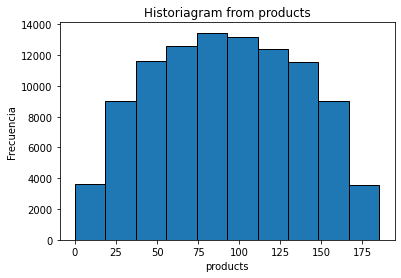

(None,
                   f0             f1             f2        product
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean        0.500419       0.250143       2.502647      92.500000
 std         0.871832       0.504433       3.248248      44.288691
 min        -1.408605      -0.848218     -12.088328       0.000000
 25%        -0.072580      -0.200881       0.287748      56.497507
 50%         0.502360       0.250252       2.515969      91.849972
 75%         1.073581       0.700646       4.715088     128.564089
 max         2.362331       1.343769      16.003790     185.364347,
 0,
 id         0
 f0         0
 f1         0
 f2         0
 product    0
 dtype: int64,
       id        f0        f1        f2     product
 0  txEyH  0.705745 -0.497823  1.221170  105.280062
 1  2acmU  1.334711 -0.340164  4.365080   73.037750
 2  409Wp  1.022732  0.151990  1.419926   85.265647
 3  iJLyR -0.032172  0.139033  2.978566  168.620776
 4  Xdl7t  1.988431  0.155413  4.751769 

In [4]:
data_information(geo_data1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


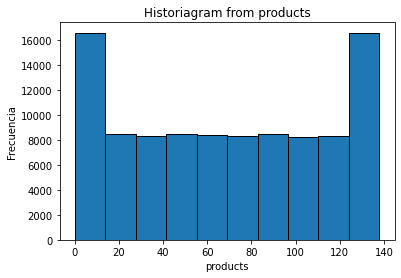

(None,
                   f0             f1             f2        product
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean        1.141296      -4.796579       2.494541      68.825000
 std         8.965932       5.119872       1.703572      45.944423
 min       -31.609576     -26.358598      -0.018144       0.000000
 25%        -6.298551      -8.267985       1.000021      26.953261
 50%         1.153055      -4.813172       2.011479      57.085625
 75%         8.621015      -1.332816       3.999904     107.813044
 max        29.421755      18.734063       5.019721     137.945408,
 0,
 id         0
 f0         0
 f1         0
 f2         0
 product    0
 dtype: int64,
       id         f0         f1        f2     product
 0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
 1  62mP7  14.272088  -3.475083  0.999183   26.953261
 2  vyE1P   6.263187  -5.948386  5.001160  134.766305
 3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
 4  AHL4O  12.702195  -8.14743

In [5]:
data_information(geo_data2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


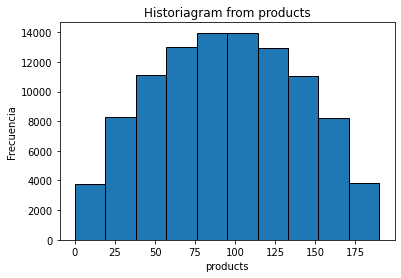

(None,
                   f0             f1             f2        product
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean        0.002023      -0.002081       2.495128      95.000000
 std         1.732045       1.730417       3.473445      44.749921
 min        -8.760004      -7.084020     -11.970335       0.000000
 25%        -1.162288      -1.174820       0.130359      59.450441
 50%         0.009424      -0.009482       2.484236      94.925613
 75%         1.158535       1.163678       4.858794     130.595027
 max         7.238262       7.844801      16.739402     190.029838,
 0,
 id         0
 f0         0
 f1         0
 f2         0
 product    0
 dtype: int64,
       id        f0        f1        f2     product
 0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
 1  WJtFt  0.262778  0.269839 -2.530187   56.069697
 2  ovLUW  0.194587  0.289035 -5.586433   62.871910
 3  q6cA6  2.236060 -0.553760  0.930038  114.572842
 4  WPMUX -0.515993  1.716266  5.899011 

In [6]:
data_information(geo_data3)

### Entrenamiento y prueda del modelo por region

In [7]:

def calculate_model(data,features,target,test_size=0.25,random_state=12345):
    
    features_train,features_valid,target_train,target_valid = train_test_split(data[features],data[target],test_size=test_size,random_state=random_state)
    model = LinearRegression()
    model.fit(features_train,target_train)
    predictions= model.predict(features_valid)
    rmse = np.sqrt(mean_squared_error(target_valid,predictions))
    mean_value = predictions.mean()
    return rmse,mean_value,model, target_valid, predictions


Se realiza una funcion que permite entrenar un modelo de acuerdo al dataset, features,target , tomando en cuenta el requerimiendo de la validacion 77:25, retornando el rmse , mean value y el modelo de entrenamiento.

In [14]:
features = ['f0','f1','f2']
target = 'product'

rems_1,mean_volume_1,model_1,target_valid_0,predictions_0 = calculate_model(geo_data1,features,target)
rems_2,mean_volume_2,model_2,target_valid_1,predictions_1 = calculate_model(geo_data2,features,target)
rems_3,mean_volume_3,model_3,target_valid_2,predictions_2= calculate_model(geo_data3,features,target)
print(f"Region 0: RMSE = {rems_1}, Volumen medio: {mean_volume_1}")
print(f"Region 1: RMSE = {rems_2}, Volumen medio: {mean_volume_2}")
print(f"Region 2: RMSE = {rems_3}, Volumen medio: {mean_volume_3}")


Region 0: RMSE = 37.5794217150813, Volumen medio: 92.59256778438035
Region 1: RMSE = 0.893099286775617, Volumen medio: 68.728546895446
Region 2: RMSE = 40.02970873393434, Volumen medio: 94.96504596800489


Se aplica la funcion a los tres datasets, para calcular el RMSE y el volumen medio en la produccion de productos de cada region.

Determinando que la region 1 tiene un Root Mean Square Error de 0.89 traduciendo que el modelo es mas exacto en calcular que sus contrapartes , con un volumen medio de 68.72, que aunque es un volumen mas bajo en comparacion con los otros dos, es mas propenso a ser real.

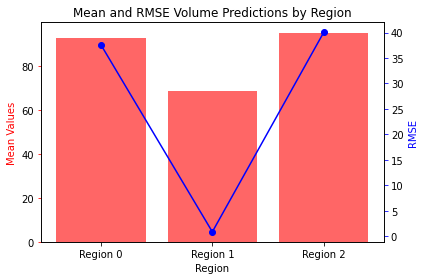

In [10]:

### hacer una visualizacion de los datos
rems = [rems_1,rems_2,rems_3]
mean_values= [mean_volume_1,mean_volume_2,mean_volume_3]
regions = ['Region 0','Region 1','Region 2']
fig,ax1 = plt.subplots()
ax1.set_xlabel('Region')
ax1.set_ylabel('Mean Values',color='red')
ax1.bar(regions,mean_values,color='red',alpha=0.6,label='Mean Values')
ax1.tick_params(axis='y',color='red')
ax2 = ax1.twinx()
ax2.set_ylabel('RMSE',color='blue')
ax2.plot(regions,rems,color='blue',marker='o',label='RMSE')
ax2.tick_params(axis='y',color='blue')
plt.title('Mean and RMSE Volume Predictions by Region')
fig.tight_layout()
plt.show()

Se visualizan los resultados de acuerdo al RMSE y el volumen medio por region.


### Calculo de ganancias

In [16]:
presupuesto_total = 100_000_000
ingreso_por_unidad = 4500
volumen_equilibrio_por_pozo = 500_000
ingreso_por_barril = 4.5
unidades_equilibrio_por_pozo = volumen_equilibrio_por_pozo/ingreso_por_unidad

print("Comparacion del volumen de equilibrio con el volumen de reservas:")
print(f"Region 0: {mean_volume_1} - {'Rentable' if mean_volume_1 >= unidades_equilibrio_por_pozo else 'No rentable'}")
print(f"Region 1: {mean_volume_2} - {'Rentable' if mean_volume_2 >= unidades_equilibrio_por_pozo else 'No rentable'}")
print(f"Region 2: {mean_volume_3} - {'Rentable' if mean_volume_3 >= unidades_equilibrio_por_pozo else 'No rentable'}")


Comparacion del volumen de equilibrio con el volumen de reservas:
Region 0: 92.59256778438035 - No rentable
Region 1: 68.728546895446 - No rentable
Region 2: 94.96504596800489 - No rentable


De acuerdo al calculo de las unidades de equilibrio por pozo ninguno de los pozos es rentable debido a que la medida de rquilibrio es 111 barriles por pozo.

### Calculando ganancias en regiones petroleras

In [17]:
def add_predictions(data,features,model):
    predictions = model.predict(data[features])
    data['prediction'] = predictions
    return data

def calculate_ganancias(target_valid, predictions, precio_por_unidad=4500, presupuesto=100_000_000, top_pozos=200):
    data = pd.DataFrame({
        'target_valid': target_valid,
        'predictions': predictions
    })
    mejores_pozos = data.sort_values(by='predictions', ascending=False).head(top_pozos)
    
    volumen_total = mejores_pozos['predictions'].sum()
    ganancia_potencial = volumen_total * precio_por_unidad
    
    ganancia_neta = ganancia_potencial - presupuesto
    return ganancia_neta




Se crean dos funciones una para integrar las prediciones por fila en los data sets y la segunda para calcular las ganancias en los mejores 200 predicciones por region.

In [18]:
data_geo1_with_prediction = add_predictions(geo_data1,features,model_1)
data_geo1_with_prediction.head(5)



,id,f0,f1,f2,product,prediction
0,txEyH,0.705745,-0.497823,1.221170,105.280062,95.461973
1,2acmU,1.334711,-0.340164,4.365080,73.037750,116.227394
2,409Wp,1.022732,0.151990,1.419926,85.265647,88.750254
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,95.419237
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,114.138969


Se ejecuta la funcion por dataset,modelo y se imprime una muestra

In [19]:
data_geo2_with_prediction = add_predictions(geo_data2,features,model_2)
data_geo2_with_prediction.head(5)


,id,f0,f1,f2,product,prediction
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103,3.853530
1,62mP7,14.272088,-3.475083,0.999183,26.953261,26.592376
2,vyE1P,6.263187,-5.948386,5.001160,134.766305,135.665691
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408,138.544872
4,AHL4O,12.702195,-8.147433,5.004363,134.766305,134.867164


In [20]:

data_geo3_with_prediction = add_predictions(geo_data3,features,model_3)
data_geo3_with_prediction.head(5)

,id,f0,f1,f2,product,prediction
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673,75.968506
1,WJtFt,0.262778,0.269839,-2.530187,56.069697,66.329664
2,ovLUW,0.194587,0.289035,-5.586433,62.871910,48.880039
3,q6cA6,2.236060,-0.553760,0.930038,114.572842,86.178035
4,WPMUX,-0.515993,1.716266,5.899011,149.600746,114.363434


In [36]:
ganancia_neta_zona_0= calculate_ganancias(target_valid_0, predictions_0)
print(f'Ganancia potenciales Zona 0: {ganancia_neta_zona_0} USD')

Ganancia potenciales Zona 0: 39960488.77465129 USD


Se calculan las ganancias potenciales tomando en cuenta los 200 pozos con mayor numero de prediccion.

In [22]:
ganancia_neta_zona_1 = calculate_ganancias(target_valid_1, predictions_1)
print(f'Ganancia potenciales Zona 1: {ganancia_neta_zona_1} USD')

Ganancia potenciales Zona 1: 24857120.51973541 USD


In [23]:
ganancia_neta_zona_2 = calculate_ganancias(target_valid_2, predictions_2)
print(f'Ganancia potenciales Zona 2: {ganancia_neta_zona_2} USD')


Ganancia potenciales Zona 2: 33217543.962432563 USD


Se concluye que la zona que tiene mayor rendimientos potenciales es la zona 0 con un total de 39960488 USD.

### Calculando riesgos y ganancias

In [32]:
def calcular_ganancias_bootstrap(predictions, target_valid, precio_por_unidad=4500, presupuesto=100_000_000, top_pozos=200):
    resultados_simulados = []

    data = pd.DataFrame({
        'target_valid': target_valid,
        'predictions': predictions
    }).reset_index(drop=True)  
    
    for _ in range(1000):  # Número de simulaciones
        muestra = data.sample(n=500, replace=True)
        
        indices_mejores_pozos = muestra.nlargest(top_pozos, 'predictions').index
        
        target_mejores_pozos = data.loc[indices_mejores_pozos, 'target_valid']
        
        ganancia_total = target_mejores_pozos.sum() * precio_por_unidad
        
        ganancia_neta = ganancia_total - presupuesto
        resultados_simulados.append(ganancia_neta)
    
    resultados = np.array(resultados_simulados)
    
    ganancia_media = resultados.mean()
    intervalo_confianza = np.percentile(resultados, [2.5, 97.5])
    riesgo_perdidas = (resultados < 0).mean() * 100

    return ganancia_media, intervalo_confianza, riesgo_perdidas

Se crea funcion para calcular las ganancias de acuerdo a un numero de 1000 simulaciones, rescatando la ganancia media, intervalo de confianza del 95% y el riesgo de perdidas.

In [33]:

ganancia_media_zona_1,intervalo_de_confianza_1,riesgo_perdidas_1 = calcular_ganancias_bootstrap(predictions_0,target_valid_0)
print(f'Zona 0 : Ganancia media {ganancia_media_zona_1}')
print(f'Zona 0 : Intevalo de confianza {intervalo_de_confianza_1}')
print(f'Zona 0 : riesgo de perdidas {riesgo_perdidas_1}')

Zona 0 : Ganancia media 3893914.4510480124
Zona 0 : Intevalo de confianza [-1571965.08532716  8864596.32182089]
Zona 0 : riesgo de perdidas 6.7


In [34]:
ganancia_media_zona_2,intervalo_de_confianza_2,riesgo_perdidas_2 = calcular_ganancias_bootstrap(predictions_1,target_valid_1)
print(f'Zona 1 : Ganancia media {ganancia_media_zona_2}')
print(f'Zona 1 : Intevalo de confianza {intervalo_de_confianza_2}')
print(f'Zona 1 : riesgo de perdidas {riesgo_perdidas_2}')

Zona 1 : Ganancia media 4519323.284191359
Zona 1 : Intevalo de confianza [ 431053.89492409 8703429.55437738]
Zona 1 : riesgo de perdidas 1.6


In [35]:
ganancia_media_zona_3,intervalo_de_confianza_3,riesgo_perdidas_3 = calcular_ganancias_bootstrap(predictions_2,target_valid_2)
print(f'Zona 2 : Ganancia media {ganancia_media_zona_3}')
print(f'Zona 2 : Intevalo de confianza {intervalo_de_confianza_3}')
print(f'Zona 2 : riesgo de perdidas {riesgo_perdidas_3}')

Zona 2 : Ganancia media 3823360.906005231
Zona 2 : Intevalo de confianza [-1584640.55750498  9253089.8946584 ]
Zona 2 : riesgo de perdidas 8.1


La zona con mayor numero de ganancias medias potenciales es la zona 1 con 4519323.28 USD con un riesgo de perdidas del 1.6 %, seguido de la zona 0 con ganancias de 3893914 USD y por ultimo la zona 2 con ganancias de  3823360 USD ambas con porcdentaje de riesgo altas que ronda entre los 6.7 y los 8.1.


### Conclusiones Generales

Después de un análisis exhaustivo de tres regiones utilizando modelos de regresión lineal para predecir el volumen de reservas de petróleo, hemos llegado a varias conclusiones clave que guiarán la decisión de inversión en el desarrollo de pozos petrolíferos.

La Región 0, con un RMSE de 37.57 y un volumen medio de reservas predicho de 92.59, mostró ser la región con la menor precisión en las predicciones. Sin embargo, las ganancias potenciales determinando los 200 mejores pozos calculadas para esta región son significativas, con una ganancia media de aproximadamente  3,893,914  millones de dólares, y un intervalo de confianza que sugiere que las ganancias reales estarían entre -1,571,965.08  y 8,864,596.32 millones de dólares en el 95% de los casos simulados. Se detectó riesgo de pérdidas en las simulaciones de bootstrapping del 6.7%.

La Región 1 presentó el RMSE más bajo, indicando una alta precisión en las predicciones de volumen de reservas, con un valor medio de 68.73. A pesar de tener el volumen medio más bajo entre las tres regiones, la ganancia media esperada es de aproximadamente 4,519,323 millones de dólares, con un intervalo de confianza entre 431,053 USD y 8,703,429 millones de dólares , con el mayor riesgo detectado entre las otras regiones , con un 1.6%.

La Región 2 tuvo un RMSE de 40.03 y el volumen medio más alto de 94.96. La ganancia media esperada para esta región es de aproximadamente 3,823,360 millones de dólares, con un intervalo de confianza que va de -1584640.55 USD a 9253089.89 millones de dólares, con un riesgo del 1.6 % en las simulaciones.

Ninguna de las regiones se considera directamente "no rentable" a pesar de que el volumen de equilibrio comparado con el volumen de reservas predicho sugiere lo contrario; esto se debe a que las ganancias potenciales y el riesgo de pérdidas calculados son favorables en todas las regiones.

Dada la alta precisión de las predicciones y la rentabilidad esperada, se recomienda priorizar la inversión en la Región 1 para el desarrollo de pozos petrolíferos. 
